### split_on_morphology
- this script finds the trends of $\lambda_R$ vs $M_{halo}$ for individual morphological classifications.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [8]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/split_on_morphology/'

# initiating catalog class objects.
total = catalog.Catalog(basepath)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath)
total.remove_satellites()

# creating copies of these objects and cutting on morphology.
s0sa = copy.deepcopy(total) 
s0sa.select_morphology('s0sa')

sbsd = copy.deepcopy(total) 
sbsd.select_morphology('sbsd')

etgs = copy.deepcopy(total) 
etgs.select_morphology('etg')

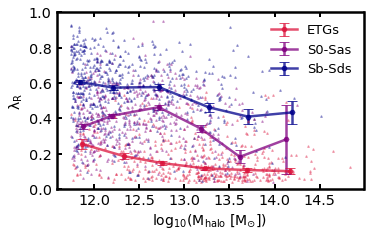

In [9]:
x_bins = np.array([12, 12.5, 13, 13.5, 14]) 
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(figsize=(5.5,3.25))

etgs.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, 'ETGs', ax, colors=['crimson'])
s0sa.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, 'S0-Sas', ax, colors=['purple'])
sbsd.plot_binned_percentiles_three_props("halo_mass_stel", "lambda_re", "stellar_to_halo_ratio", x_bins, z_percentiles, 'Sb-Sds', ax, colors=['darkblue'])

etgs.plot_scatter("halo_mass_stel", "lambda_re", ax, color='crimson')
s0sa.plot_scatter("halo_mass_stel", "lambda_re", ax, color='purple')
sbsd.plot_scatter("halo_mass_stel", "lambda_re", ax, color='darkblue')

ax.legend(frameon=False, fontsize=13)
ax.set_ylim([0, 1])
ax.set_ylabel("$\mathrm{\lambda_R}$", fontsize=14)
ax.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=14)
plt.savefig(outpath+'lambdaR_mhalo_binned.pdf', format='pdf', bbox_inches='tight')
